# Classificação: Regressão Logística X Regressão Linear

Você aprendeu que a regressão linear é um modelo para a predição de valores ou quantidades contínuas, e que a regressão logística é um modelo para a predição de classes binárias. Entretanto, se considerarmos duas classes $0, 1$ como valores podemos empregar um modelo de regressão linear também para a classificação. 


**Neste projeto você vai escolher e empregar uma base de dados pública para comparar o uso da regressão linear e da regressão logística na classificação binária de dados**.


<img src="https://static.javatpoint.com/tutorial/machine-learning/images/linear-regression-vs-logistic-regression.png" width=500, align="left">

**Objetivo**: Empregar uma base de dados pública para comparar o uso da regressão linear e da regressão logística na classificação binária de dados. Discutir os resultados e comparar com a referências sobre o tema.


**Dados**. 

- **Base pública:**. Indicando as referências *Kaggle* ou bases públicas de governo são ideais.

- **Compartilhe a base para que a execução do notebook** do seu projeto esteja disponível para qualquer um. Sugestão: carregue no GitHub em uma pasta pública. Não empregue o Google Drive pois seria necessário adicionar um atalho.

- **Min 1000 instâncias e 5 atributos preditores**.
- **Podem ser empregadas transformações nos dados para criação das classes**. Não é o recomendado, mas se você estiver seguro da transformação e justificar adequadamente pode empregar. A transformação deve constar do código do notebook.

**Entrega**. 
Acesse aqui o [template](https://colab.research.google.com/github/Rogerio-mack/IA_2022_1S/blob/main/IA_Projeto_N1_template.ipynb)  da entrega. Todos esses itens devem ser produzidos a partir dos dados brutos com Python e o notebook deve ser 100% executável.

- **Data para Entrega** : 06.04

- **Trabalho em Grupo** : Mínimo 2 e máximo 5 alunos. 

- **Critério de Avaliação**: N1 = .4 Atividade Avaliativa 1 + .4 Exercicios 1 + .2 Projeto

# Grupo - MILF 
- Giancarlo Ponte Gamberi - 31944043
- Rone Tadeu Filho - 31938698
- Guilherme Reis - 31920918

Sala 7N

In [9]:
## Bibliotecas necessárias
import pandas as pd
import seaborn as sn

import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Base de Dados:

*Descreva aqui os dados utilizados, discuta eventuais transformações e/ou seleções dos dados e preparações nos dados.* 

<br>

Selecionamos uma base de dados que contém o preço de stock em tempo real da empresa IBM das datas: 06-04-2020 - 25-03-2022,

Um dos motivos de ter sido escolhida para este trabalho foi o fato de ser uma base quase inteiramente numérica, como único desafio sendo elaborar uma coluna classificativa, que no caso será se uma ação fechará em alta ou não:
`('superavit': 0,1)`


In [3]:
## Leitura do Arquivo
dataframe = pd.read_csv('https://raw.githubusercontent.com/REXDES/N1-IA-Projeto/main/2%20Year%20IBM%20Stock%20Data.csv')
dataframe = dataframe.dropna()      # Tira os dados nulos

# Adicionando coluna superavit, que classifica binariamente se uma ação 
# subiu ou não, em relação ao preço de abertura e fechamento do dia.
dataframe['superavit'] = (dataframe['close'] > dataframe['open'])/1
dataframe.head()


,time,open,high,low,close,volume,superavit
0,3/25/2022 19:19,131.300,131.30,131.300,131.30,718,0.0
1,3/25/2022 19:18,131.300,131.30,131.300,131.30,282,0.0
2,3/25/2022 17:50,131.300,131.30,131.300,131.30,100,0.0
3,3/25/2022 16:59,131.340,131.35,131.340,131.35,1427,1.0
4,3/25/2022 16:42,131.326,131.35,131.326,131.35,1326,1.0


# Regressão Linear

In [4]:
## Regressão Linear

# Criando os dados
x = dataframe.drop(columns=['superavit'])
y = dataframe['superavit']

# Treinamento
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=1984)

# Base de teste para ser carregada no Modelo
new_dataframe = pd.concat([X_train, y_train], axis=1)

# Modelo
model = sm.ols(formula="superavit ~ open + close", data=new_dataframe)

# Resultados
result = model.fit()
print(result.summary())


y_pred = result.predict(X_test)

# Retornando os dados float para binariedade
y_pred = (y_pred > 0.5)/1

acuracidade = sum(y_pred == y_test)*100 / len(y_pred)
print(f"\n\nAcuracidade: {acuracidade:.3f}.")


                            OLS Regression Results                            
Dep. Variable:              superavit   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                 3.826e+04
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:13:52   Log-Likelihood:                -78065.
No. Observations:              151818   AIC:                         1.561e+05
Df Residuals:                  151815   BIC:                         1.562e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4086      0.011     36.424      0.0

# Regressão Logística

Acuracidade: 97.459.


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

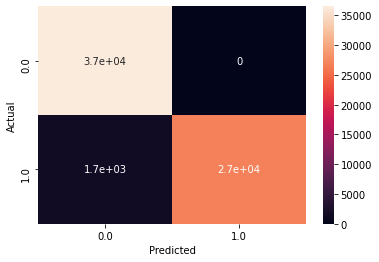

In [10]:
### Regressão Logísitca
df_filtrado = dataframe[['superavit', 'open', 'close']]

x = df_filtrado.drop(columns=['superavit'])
y = df_filtrado['superavit']

#separando modelo para treinamento/teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=1984)

reg_logistica = LogisticRegression()
reg_logistica.fit(X_train, y_train)


y_pred = reg_logistica.predict(X_test)

acuracidade = sum(y_pred == y_test)*100 / len(y_pred)
print(f"Acuracidade: {acuracidade:.3f}.")

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)


# Conclusão e Análises

Comparando as duas regressões podemos perceber que na regressão logística a acuracidade é de 97.54% enquanto o R-Squared da regressão linear bateu apenas 0.335.

A diferença drástica mostra que, mesmo que uma determinada regressão possa fazer o trabalho, não quer dizer que deve ser usada. 

A regressão logística é utilizada para casos binários, por isso a acuracidade é maior e od dados são mais confiáveis vindo dela. Regressão linaer, apesar de conseguir trabalhar com dados binários, não mostra um resultado confiante.

# Referências 

*Indique as referências empregadas, incluindo as fontes de dados.*

Fonte de dados:
https://raw.githubusercontent.com/REXDES/N1-IA-Projeto/main/2%20Year%20IBM%20Stock%20Data.csv

Notebooks referencia e referencial teórico:
https://github.com/Rogerio-mack/IA_2022_1S/blob/main/README.md